# PCAによる次元削減まとめ

参考文献

https://towardsdatascience.com/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe

http://www.statistics.co.jp/reference/software_R/statR_9_principal.pdf

https://tech-clips.com/article/433036

https://shankarmsy.github.io/posts/pca-sklearn.html

# インデックス

<pre>
1. PCAとは
2. 次元の縮約と情報の損失
3. 主成分分析の要点
4. 関連する基礎知識のおさらい
5. 部分空間(Subspace)
6. 固有値問題(Eigen decomposition)
7. 特異値分解(Singular Value Decomposition SVD)
8. 画像を用いたPCA による次元削減
9. RandomizedPCA
</pre>

# 1. PCAとは

<b>PCA（Principal Complete Analysis, 主成分分析）</b><br>
・多次元データのもつ情報をできるだけ損わずに低次元空間に情報を縮約する方法

・多次元データを２次元・３次元データに縮約できれば、<br>
　データ全体の雰囲気を視覚化することができる。<br>
　視覚化により、データが持つ情報を解釈しやすくなる。

PCAのアプローチは<br>
・固有値分解(Eigen decomposition)<br>
・特異値分解(SVD; Singular Value Decomposition)<br>
の二つの有名なものがあります。<br>
固有値分解と特異値分解ともに行列を分解する方法です。

固有値分解による主成分分析は、<br>
共分散行列の固有値問題を解き、大きな固有値を持つ固有ベクトルで部分空間を構成して、<br>
元の情報を表現します。

# 2. 次元の縮約と情報の損失

・2次元のデータを1次元に縮約することを考える。<br>
・射影したデータのバラツキが大きいほど、もとのデータの情報を多く含んでいると考えられる。<br>
・もとのデータの情報の損失ができるだけ小さくなるような軸を探したい。<br>

<img src="http://104.199.124.155/note/image001.jpg">

<img src="http://104.199.124.155/note/image002.jpg">

<img src="http://104.199.124.155/note/image003.jpg">

### ３次元空間から２次元空間への縮約

<img src="http://104.199.124.155/note/image004.jpg">


# 3. 主成分分析の要点

・主成分の分散 : 主成分がもつ情報量<br>
　＝分散共分散行列（相関行列）の固有値<br>
・主成分を構成する係数は、分散共分散行列（相関行列）の<br>
　固有ベクトルを求める手続きにより得られる<br>
・主成分分析では、分散共分散行列から分析を<br>
　行う場合と、相関行列から行う場合で結果が異なる。<br>
・データが異なる尺度（単位）で測定されている場合には、変数を基準化して分析を行う必要がある。

# 4. 関連する基礎知識のおさらい

<b>分散 (variance)</b><br>
各データが平均値（期待値）からどれだけ離れて散らばっているかを示すもの<br>
通常平均値とデータの距離の二乗の平均で求める

<b>共分散 (covariance)</b><br>
複数の対応するデータ群での平均とデータ群内の各データの差を掛けあわせて平均を取ったもの<br>

<b>分散・共分散行列 (variance・covariance matrix)</b><br>
ある変数xの分散は共分散としてはxとxの共分散と表すことができるので、<br>
それらを含んだ共分散行列

<b>標準偏差 (standard deviation)</b><br>
分散は符号の影響を排除し、ばらつきの大きさのみを見るため二乗しているもの<br>
標準偏差は元データの単位と同様になるよう分散の正の平方根を取ったもの

<b>固有値問題 (eigenvalue problem)　</b><br>
線形変換の固有値、及び固有ベクトルを求める問題

<b>寄与率 (contributing rate)</b><br>
観測データの全情報量に対してどの程度の情報量を個々の主成分が集めたかを示す比率

<b>累積寄与率 (cumulative contribution ratio)</b><br>
比率が大きい順番に固有値を足し算をした積算量を全情報量で割り算した比率になっている<br>
取り上げたいくつかの主成分はもとの全情報量の何割になっているかを示す指標で、<br>
取り上げた主成分でどれくらい説明できたかどうか判断する指標

<b>第1主成分</b><br>
X軸とY軸の散布図を書いて、点々の真中ほどに直線を引いたもの

<b>第2主成分</b><br>
XとYの平均値（重心）を通って、第1主成分である直線に直角の線を引いたもの

<img src = "https://camo.qiitausercontent.com/94dea877d8cbd9cc27280d3c0d3d7538c881cb8f/687474703a2f2f7777772e6d696e64776172652d6a702e636f6d2f62617369632f7063612e676966">


# 5. 部分空間(Subspace)

<b>部分空間</b>とは<br>
ある構造を持った集合 $X$ について、空間と呼ばれる構造を保つための部分集合のこと。

<b>1次結合</b>とは<br>
線形結合、線形和ともいう。ベクトルの定数倍と加え合わせ。<br>

例<br>
2次元数ベクトル $V=(2,3)$ と $W=(1,2)$ を用いて、$2V+3W$ としたら<br>
$(7,12)$ というベクトルが作れます。

<b>d次元ベクトル空間Vの部分空間の定義</b><br>
$x_1,....x_r(≤d)$ を $V$ のベクトルとする $x_1,....x_r$ の1次結合全体の集合。<br>
$W = a_1x_1+...a_rx_r|ai∈R,i=1,....r$<br>
は $V$ の部分空間となります。

つまり、$W$ が $x_1,....x_r$ で張られる $r$ 次元の部分空間であるとは $x_1,....x_r$ は1次独立、<br>
どの $x_i$ も 他の $r−1$ 個の $x_j(j≠i)$ の<b>線形結合で表すことができない</b>ということ。

上記の部分空間の定義から、$W$ が$V$ の部分空間であるための必要十分条件は、<br>
以下が成り立つこととなります。
1. $W≠θ$<br>
2. $x,y∈W⇒x+y∈W$<br>
3. $x∈W,λ∈R⇒λx∈W$


下図は部分空間への射影ベクトルとその直交成分です。
<img src="https://goo.gl/GfHWzc">



# 6. 固有値問題(Eigen decomposition)

学習データ
\begin{equation*}
x_i=(x_i1,...x_id)^{\mathrm{T}}　　(i = 1,...,N)
\end{equation*}
の<b style="color:red">分散が最大になる方向への線形変換</b>を求める手法。

N個のデータからなるデータ行列を $X=(x_1,...x_N)^{\mathrm{T}}$
それから平均ベクトル $\bar{x}=(\bar{x_1}...,\bar{x_d})^{\mathrm{T}}$ を引き算したデータ行列を<br>
$\bar{X}=(x_1 - \bar{x}....,x_N - \bar{x})^{\mathrm{T}}$ とすると、
\begin{equation*}
\sum = Var\{\bar{X}\} = \frac{1}{N}\bar{X}^{\mathrm{T}}\bar{X}\
\end{equation*}
で定義されます。

N個のデータ $x_i - \bar{x}$ を係数ベクトル
\begin{equation*}
a_j=(a_{j1}...a_{jd})^{\mathrm{T}}　　(j = 1....,d)
\end{equation*}
を用いて線形変換すると、
\begin{equation*}
s_j = (s_{1j},....s_{Nj})^{\mathrm{T}} = \bar{Xa}_j
\end{equation*}
が得られます。

この変換後のデータの散文は、$s_{1j},....s_{Nj}$ の平均が0となるので、

\begin{equation*}
Var\{{s_j}\} = \frac{1}{N}{s}_j^Ts_j = \frac{1}{N}(\bar{Xa}_j)^{\mathrm{T}}(\bar{Xa}_j) = \frac{1}{N}{a}_j^T\bar{X}^{\mathrm{T}}\bar{Xa}_j = a_j^TVar\{{\bar{X}\}}a_j
\end{equation*}

となります。この分散が最大となる射影ベクトルは、係数ベクトル$a_j$のノルムを1に制約した<b>ラグランジェ関数</b>
\begin{equation*}
E(a_j) = a_j^TVar\{{\bar{X}\}}a_j - \lambda(a_j^T - 1)
\end{equation*}
を最大にする　$a_j$　を見つければよいことになります。λはラグランジェ未定定数。


$a_j$ で微分して0としておけば、
\begin{equation*}
\frac{\partial E(a_j)}{\partial a_j} = 2Var{{\bar{X}}}a_j - 2\lambda a_j = 0　　　　 (式1)
\end{equation*}

より、　$Var \{\bar{X}\}a_j = \lambda a_j$　が得られます。

これは、元のデータの共分散行列に関する<b>固有値問題</b>を解くことにより。分散最大となる<br>
射影ベクトル $a_j$ が得られることを示しています。

(式1)を解いて得られる固有値を　$\lambda_1\geq...\geq\lambda_d$　とし、
対応する固有ベクトルを　$a_1,...,a_d$　とします。<br>
共分散行列が実対称行列であることから、固有ベクトルは相互に直交し、
\begin{equation*}
a^T_ia_j = \delta = \left\{\begin{array}{rcr} 1 & (i = j) \\ 0 & (i \neq j) \end{array}\right.
\end{equation*}

が成り立ちます。$δ$ はクロネッカーのデルタ。

元のデータの共分散行列は　$d×d$　の行列なので、得られる非ゼロ固有値の数は<br>
共分散行列のランクで決まり、最大$d$となります。

最大固有値に対応する固有ベクトルで線形変換した特徴の分散は、
\begin{equation*}
Var\{{s_1}\} = a^T_1Var\{\bar{X}\}a_1 = \lambda _1a^T_1a_1 = \lambda _1
\end{equation*}

となり、最大固有値に一致します。<br>
最大固有値に対応する固有ベクトルで、線形変換された特徴量を<b>第1成分</b>といいます。<br>
$k$ 番目の固有値に対応する固有ベクトルで変換された特徴量を第 $k$ 主成分といいます。

変換された特徴量の分散は固有値に一致するので、全分散量は
\begin{equation*}
V_{total} = \sum_{i=1}^d \lambda _i
\end{equation*}

となり、これは元データのもつ全分散量とも一致します。

第 $k$ 主成分の分散の全分散に対する割合
\begin{equation*}
c_k = \frac{\lambda _k}{V_{total}}
\end{equation*}

を、第 $k$ 成分の寄与率といい、第k成分までの累積寄与率$γ_k$は
\begin{equation*}
\gamma _k = \frac{\sum_{i=1}^k \lambda _i}{V_{total}}
\end{equation*}
で定義されます。

 # 7. 特異値分解(Singular Value Decomposition SVD)

行列を複数の行列の積に分解する手法として、グラム-シュミットの正規直交基底を得るためのQR分解があります。

一方、主成分分析に密接に関連した行列の分解法に特異値分解(SVD)があります。<br>
任意の $n×p$ 行列Xは、
\begin{equation*}
X = UΛV^T
  = (u_1 u_2 ... u_p) 
  \left(
    \begin{array}{cccc}
      \sqrt{λ_1} & 0 & \ldots & 0 \\
      0 & \sqrt{λ_2} & \ldots & 0 \\
      \vdots & \vdots & \ddots & \vdots \\
      0 & 0 & \ldots & \sqrt{λ_p}
    \end{array}
  \right)
  \left(
    \begin{array}{cccc}
      \upsilon^T_1 \\
      \upsilon^T_2 \\
      \vdots \\
      \upsilon^T_p 
    \end{array}
  \right)
\end{equation*}

のように三つの行列の積に分解することができます。これを、<b>特異値分解</b>といいます。

ここで、$U$ は $XX^T$ の非ゼロ固有値に対応する固有ベクトルからなる、$n×p$ 列正規直交行列です。<br>
$V$ は、$X^TX$ の非ゼロ固有値に対応する固有ベクトルからなる、$p×p$ 列正規直交行列です。

$\Lambda$ は、$XX^T$ または $X^TX$ の非ゼロ固有値の平方根（特異値という）を、$λ1≥λ2≥...≥λp$ の順に<br>
並べて対角要素とした $p×p$ 対角行列です。

特異値分解と主成分分析の関係は、$n×p$ 行列 $X$ を<br>
 <b>$p$個の属性をもつ$n$個のデータ（あらかじめ平均ベクトルが引かれているものとする）</b><br>
と考えれば、$X^TX$ は共分散行列であり、その固有値と固有のベクトルが $λ_i$ と $υ_i$ そのものに
なっていることから明らかです。


また、$X=UΛV^T$ より $XV=UΛ$ が成り立つことから、
\begin{equation*}
(X\upsilon _1 \ \ X\upsilon _2 \ \ ... \ \ X\upsilon _p) = (\sqrt{\lambda _1 u_1} \ \ \sqrt{\lambda _2 u_2} \ \ ... \ \ \sqrt{\lambda _p u_p})
\end{equation*}

となる。データ行列を $υ1$ で線形変換したベクトルが $\sqrt{\lambda_1u_1}$ となるので、その分散は、
\begin{equation*}
Var\{{X_\upsilon{_1}}\} = (X_\upsilon{_1})^{\mathrm{T}}(X_\upsilon{_1}) = \left( \sqrt{\lambda _1 u_1} \right)^{\mathrm{T}}\left( \sqrt{\lambda _1 u_1} \right) = \lambda_1
\end{equation*}

となり、第1主成分の最大固有値に一致し最大となります。<br>
第1主成分から第 $q(≤p)$ 主成分までの $υi$ で構成された部分空間
\begin{equation*}
\tilde{V} = (\upsilon_1 \ \ ... \upsilon_q)
\end{equation*}

へのデータ $X$ の射影は $X\tilde{V}$ は、共分散行列が
\begin{equation*}
Var{\{X\tilde{V}\}} = (X\tilde{V})^{\mathrm{T}}(X\tilde{V}) = \tilde{V}^{\mathrm{T}}X^{\mathrm{T}}X\tilde{V} = \tilde{V}^{\mathrm{T}}V\Lambda^{\mathrm{T}}U^{\mathrm{T}}U\Lambda\tilde{V}^{\mathrm{T}}\tilde{V} \\ = \tilde{V}^{\mathrm{T}}V\Lambda^{\mathrm{2}}V^{\mathrm{T}}\tilde{V}
\end{equation*}
となります。

$\tilde{V}^{\mathrm{T}}V$ は、
\begin{equation*}
\tilde{V}^{\mathrm{T}}V =   \left(
    \begin{array}{cccc}
      \upsilon^T_1 \\
      \vdots \\
      \upsilon^T_q 
    \end{array}
  \right) \ \ 
(\upsilon_1 \ \ ... \upsilon_q) =   \left(
    \begin{array}{cccc}
      1 & 0 & \ldots & 0 & 0 & \ldots & 0 \\
      0 & 1 & \ldots & 0 & 0 & \ldots & 0 \\
      \vdots & \ddots & \ddots & 0 & \vdots & \vdots & \vdots \\
      0 & \ldots & 0 & 1 & 0 & \ldots & 0
    \end{array}
  \right)
\end{equation*}
となるので、共分散行列は、
\begin{equation*}
Var\{X\tilde{V}\} = \lambda^2_q
\end{equation*}

となる。$Λ_q$ は、特異値分解の最初の $q$ 個の特異値以外を0とした対角行列です。<br>
$Λ$ の代わりに $Λq$ を用いた行列の分解
\begin{equation*}
\tilde{X} = U\Lambda_qV^{\mathrm{T}} = \sum_{i=1}^q \sqrt{\lambda _i u_i u^T_i}
\end{equation*}

は、$X$ のランク $q$ の誤差最小という意味での最良近似となっています。




 # 8. 画像を用いたPCA による次元削減

今回はscikit-learnで用意されている顔画像を用います。<br>
64x64px = 4096次元のデータ
 
 http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
# 分析・計算用
import numpy as np

# プロット用
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習用
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import fetch_olivetti_faces
oliv=fetch_olivetti_faces()

In [3]:
oliv.keys()
oliv.data.shape

(400, 4096)

64x64(4096)ピクセルの画像が400枚格納されているのがわかります。<br>
次にMatplotlibを利用してデータを可視化して見てみましょう。<br>
※全て表示すると膨大な量になるので、8列8行の64枚だけ表示しています。

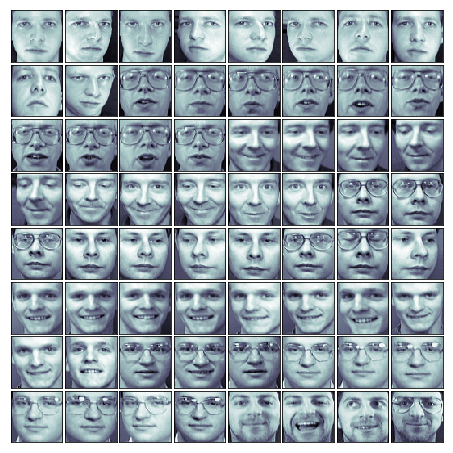

In [4]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
  ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
  ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

64x64(4096) -> 8x8(64)ピクセルへとデータを縮小してみます。

In [5]:
X,y=oliv.data, oliv.target

pca = PCA(64)
pca

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
X_proj = pca.fit_transform(X)
X_proj.shape

(400, 64)

分散がどの程度保持されているか、寄与率を確認してみます。

In [23]:
print('データの50%を表すのに軸は: {} 本'.format(np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.50)))
print('データの75%を表すのに軸は: {} 本'.format(np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.75)))
print('データの85%を表すのに軸は: {} 本'.format(np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.85)))
print('累積寄与度 {} '.format(pca.explained_variance_ratio_.sum()) )

データの50%を表すのに軸は: 3 本
データの75%を表すのに軸は: 18 本
データの85%を表すのに軸は: 39 本
累積寄与度 0.8970457911491394 


64x64を8x8に圧縮しても、依然として分散が約89.7%も残っていることがわかります。

つまりこれらの画像は、本来64x64px = 4096次元のデータですが、<br>
64本の軸（64次元)あればこのデータの約89.7%を表現することができ、<br>
3次元で約50%、18次元で約75%、39次元で85%の表現ができることがわかりました。

では、1番目の画像を対象として、次元数を増やしていって、その差を見ていきます。

まずは3次元。

 [ 0.2381271   0.13993979  0.07968608  0.04998326  0.0360985   0.03156938
  0.02426836  0.02036396  0.01958112  0.01672123  0.01595222  0.0143698
  0.01246741  0.01147133  0.01062876  0.0097772   0.0091906   0.00815574
  0.00753875  0.00746985  0.00698577  0.00614628  0.00583927  0.00569722
  0.0054619   0.00531855  0.00513815  0.0049584   0.0045766   0.00441182
  0.00401997  0.00384183  0.00361943  0.00334475  0.00320359  0.00316016
  0.00305126  0.00298574  0.00282094  0.00273894  0.00259716  0.00253888
  0.0024446   0.00239621  0.00230492  0.00226142  0.00221467  0.00219811
  0.0020861   0.00203924  0.00196222  0.00190303  0.00184152  0.00178357
  0.00176483  0.00170458  0.00166626  0.00162751  0.00158366  0.00156549
  0.00152579  0.00148845  0.00144423  0.00142237]


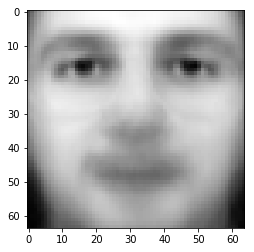

In [10]:
def draw_face_compressed(img, ndim):
    A = np.dot((face_01 - pca.mean_), pca.components_.T[:, :ndim])
    A_inv = pca.components_.T[:, :ndim].dot(A) + pca.mean_
    return A_inv

image_shape = (64,64)
face_01 = oliv.images[0].reshape(-1)

def show_compressed(img, n_dim):
    n_dim = 3
    face_compressed = draw_face_compressed(img, n_dim)
    plt.imshow(face_compressed.reshape(image_shape), cmap=plt.cm.gray)
    print("", pca.explained_variance_ratio_)

# 3次元
show_compressed(face_01, 3)

次に18次元。

 [ 0.2381271   0.13993979  0.07968608  0.04998326  0.0360985   0.03156938
  0.02426836  0.02036396  0.01958112  0.01672123  0.01595222  0.0143698
  0.01246741  0.01147133  0.01062876  0.0097772   0.0091906   0.00815574
  0.00753875  0.00746985  0.00698577  0.00614628  0.00583927  0.00569722
  0.0054619   0.00531855  0.00513815  0.0049584   0.0045766   0.00441182
  0.00401997  0.00384183  0.00361943  0.00334475  0.00320359  0.00316016
  0.00305126  0.00298574  0.00282094  0.00273894  0.00259716  0.00253888
  0.0024446   0.00239621  0.00230492  0.00226142  0.00221467  0.00219811
  0.0020861   0.00203924  0.00196222  0.00190303  0.00184152  0.00178357
  0.00176483  0.00170458  0.00166626  0.00162751  0.00158366  0.00156549
  0.00152579  0.00148845  0.00144423  0.00142237]


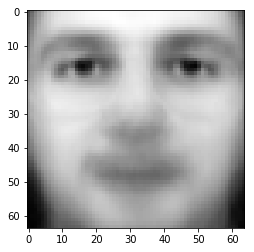

In [11]:
show_compressed(face_01, 18)

最後に64次元。

 [ 0.2381271   0.13993979  0.07968608  0.04998326  0.0360985   0.03156938
  0.02426836  0.02036396  0.01958112  0.01672123  0.01595222  0.0143698
  0.01246741  0.01147133  0.01062876  0.0097772   0.0091906   0.00815574
  0.00753875  0.00746985  0.00698577  0.00614628  0.00583927  0.00569722
  0.0054619   0.00531855  0.00513815  0.0049584   0.0045766   0.00441182
  0.00401997  0.00384183  0.00361943  0.00334475  0.00320359  0.00316016
  0.00305126  0.00298574  0.00282094  0.00273894  0.00259716  0.00253888
  0.0024446   0.00239621  0.00230492  0.00226142  0.00221467  0.00219811
  0.0020861   0.00203924  0.00196222  0.00190303  0.00184152  0.00178357
  0.00176483  0.00170458  0.00166626  0.00162751  0.00158366  0.00156549
  0.00152579  0.00148845  0.00144423  0.00142237]


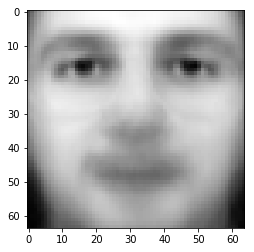

In [12]:
show_compressed(face_01, 64)

64次元になると、ほぼほぼ原型をとどめているのがわかります。

 # 9. RandomizedPCA

RandomizedPCAとは、一言で言うと<br>
「超高次元空間に分布する点群を，互いの距離関係を高い確率で保ったまま低次元空間に写像する」<br>
ことができる手法．

http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.decomposition.RandomizedPCA.html<br>
ランダム化SVDを使用する主成分分析（PCA）<br>
データの近似特異値分解を使用し、最も重要な特異ベクトルのみを保持して、<br>
より低い次元の空間にデータを投影する線形次元削減。

この実装では、ランダム化されたSVD実装が使用され、<br>
scipy.sparseおよびnumpy高密度配列の両方を入力として扱うことができます。

メリット<br>
次元削減目的に使う他の手法に比べて計算量が圧倒的に少ない。<br>
変換行列はかなり疎な行列でもよい。<br>
このことはさらに効率化できることを意味します(疎行列に特化したデータ構造・アルゴリズムが存在します)．<br>


(256, 349, 4)


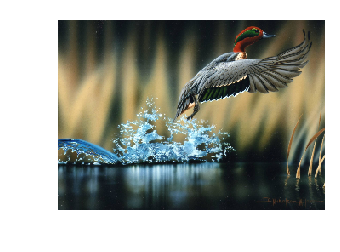

In [13]:
import matplotlib.image as mpimg

img = mpimg.imread('/var/www/html/note/image006.png')

#Now, let's look at the size of this numpy array object img as well as plot it using imshow. 
print(img.shape)

plt.axis('off')
plt.imshow(img)

今回この画像を用いて、 RandomizedPCAによる次元削減してみます。

256×349×4＝256×1396次元になっています。
それを256×64の次元に圧縮してみます。

ステップは以下の通り
<ol>
  <li>256×349×4　→　256×1396に変換   numpy.reshape による</li>
  <li>RandomizedPCAモデル生成 pca = PCA(64, svd_solver='randomized')</li>
  <li>256×1396　　→　256×64に圧縮　　 pca.transform による</li>
  <li>256×64      →　256×1396に逆変換 pca.inverse_transform による</li>
  <li>256×1396    →　256×349×4に変換 numpy.reshape による</li>
</ol>

In [14]:
# step1. 256×349×4　→　256×1396に変換 numpy.reshape による
img_r = np.reshape(img, (256, 1396))
print(img_r.shape)

(256, 1396)


In [20]:
# step2. RandomizedPCAモデル生成 pca = PCA(64, svd_solver='randomized')
# step3. 256×1396　　→　256×64に圧縮　　 pca.transform による
from sklearn.decomposition import RandomizedPCA

ipca = PCA(64, svd_solver='randomized').fit(img_r)
img_comp = ipca.transform(img_r)
print(img_comp.shape)
print( pca.explained_variance_ratio_.sum() )

(256, 64)
0.897046


1396 → 64 の次元圧縮にも関わらず、寄与度が99.3％と高いことが分かる。

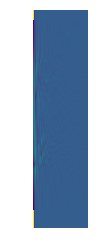

In [16]:
plt.axis('off')
plt.imshow(img_comp)

In [17]:
# step4. 256×64 →　256×1396に逆変換 pca.inverse_transform による
temp = ipca.inverse_transform(img_comp)
print( temp.shape )

(256, 1396)


In [18]:
# step5. 256×1396 →　256×349×4に変換 numpy.reshape による
#reshaping 1396 back to the original 349 * 3
temp = np.reshape(temp, (256,349,4))
print( temp.shape )

(256, 349, 4)


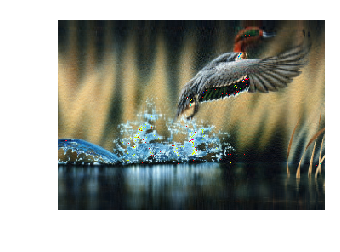

In [19]:
# now lets visualize like before with imshow
plt.axis('off')
plt.imshow(temp)